In [305]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
import warnings
from scipy import stats

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 1
}

plt.rc('axes', unicode_minus=False)
sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

In [306]:
from sklearn.datasets import load_iris 

In [307]:
X = load_iris().data
y = load_iris().target

In [316]:
from scipy.spatial.distance import pdist, squareform


distance = pdist(X.T,metric = 'euclidean')

D = squareform(distance)


# distance matrix 만들기 (유클라디안)

D

array([[ 0.        , 36.15784839, 28.96618718, 57.18303944],
       [36.15784839,  0.        , 25.77809147, 25.86406774],
       [28.96618718, 25.77809147,  0.        , 33.86473092],
       [57.18303944, 25.86406774, 33.86473092,  0.        ]])

In [317]:
# centering matrix H = I - 1/n * (11)T

H = np.eye(D.shape[0]) - np.ones_like(D).T * 1/len(D)

In [318]:
# centering 된 distance matrix

B = -1/2 * H@D@H

B

array([[ 17.58839593,  -4.80391169,  -1.10695584, -11.6775284 ],
       [ -4.80391169,   8.96162908,  -3.82629141,  -0.33142598],
       [ -1.10695584,  -3.82629141,   9.16387957,  -4.23063232],
       [-11.6775284 ,  -0.33142598,  -4.23063232,  16.2395867 ]])

In [319]:
eigen_values,eigen_vector = np.linalg.eig(B)

In [320]:
idx = eigen_values.argsort()[::-1][:2]

projection_vector = eigen_vector[idx].T * np.sqrt(eigen_values[idx])

In [325]:
decomposition = X @ projection_vector

Text(0.5, 1.0, 'IRIS MDS')

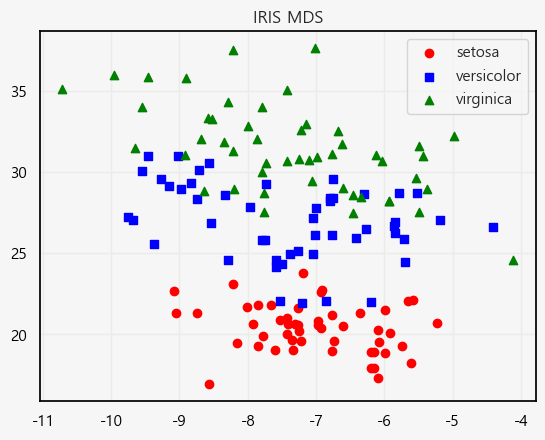

In [327]:
colors = ['red', 'blue', 'green']
labels = load_iris().target_names
scatter_markers = {0: 'o', 1: 's', 2: '^'}

fig, ax = plt.subplots()

for i in range(3):
    mask = y == i
    ax.scatter(decomposition[mask, 0], decomposition[mask, 1], c=colors[i], marker=scatter_markers[i], label=labels[i])

ax.legend() 
ax.set_title('IRIS MDS')